In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_folder = './data'
data_file = 'cleaned_data.parquet'


In [2]:
#read data
cars_data = pd.read_parquet(os.path.join(data_folder, data_file))

numerical_columns = ['price', 'year', 'yearSquared', 'odometer', 'logOdometer', 'cylinders']
categorical_columns = cars_data.columns[6:]

In [3]:
cars_data[numerical_columns].iloc[:100].shape
print(['price']+(categorical_columns.to_list()))

['price', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda', 'manufacturer_mercedes-benz', 'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_morgan', 'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toyota', 'manufacturer_volkswagen', 'manufacturer_volvo', 'm

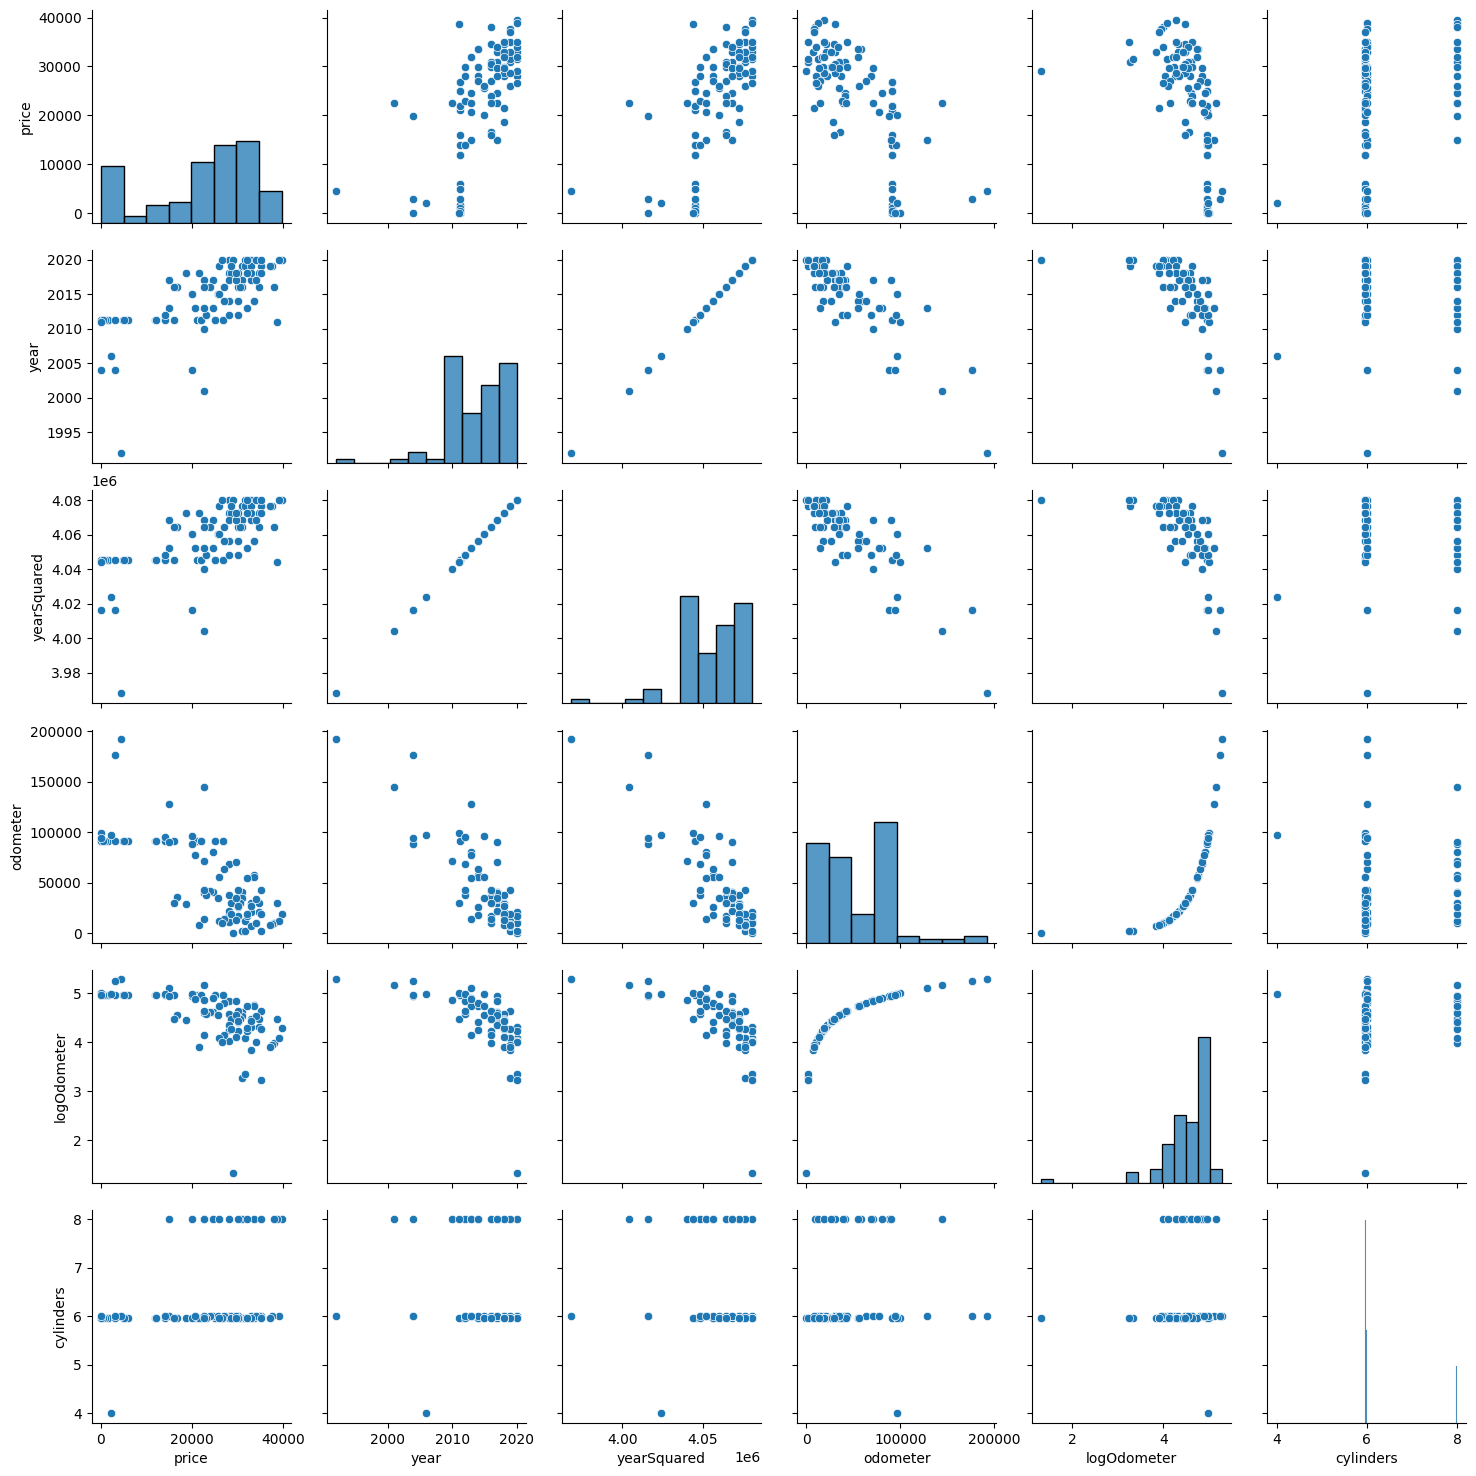

In [4]:
sns.pairplot(cars_data[numerical_columns].iloc[:100])
plt.show()

In [5]:
sns.set_theme(style="whitegrid")

corr_mat = cars_data[['price']+(categorical_columns.to_list())].corr()
print(corr_mat.size)


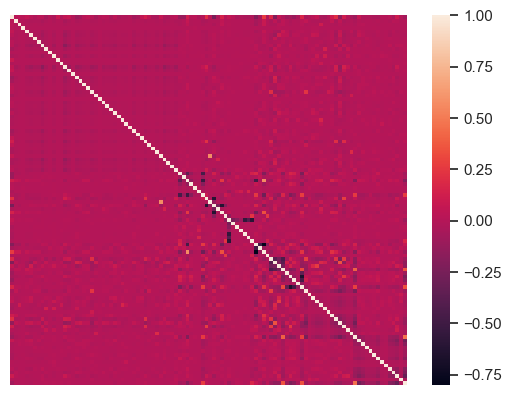

In [11]:
# Draw each cell as a scatter point with varying size and color
g = sns.heatmap(data=corr_mat, xticklabels=False, yticklabels=False)

